Click this button to run in Colab.
[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/ssuai/deep_learning_from_scratch/blob/master/ch06/compare_optimizers_for_mnist.ipynb)

In [ ]:
# optimizer_compare_mnist.py
import os
import sys
sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# some helper functions for Colab
def is_colab():
    try:
        import google.colab
        return True
    except ImportError:
        return False
    
if is_colab():
    !git clone --filter=blob:none --sparse https://github.com/ssuai/deep_learning_from_scratch.git
    %cd deep_learning_from_scratch
    !git sparse-checkout set dataset common ch06
else:        
    sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정

In [ ]:
from dataset.mnist import load_mnist
from common.util import smooth_curve
from common.multi_layer_net import MultiLayerNet
from common.optimizer import *

In [2]:
# 0. MNIST 데이터 읽기==========
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

train_size = x_train.shape[0]
batch_size = 128
max_iterations = 2000

Converting train-images-idx3-ubyte.gz to NumPy Array ...
Done
Converting train-labels-idx1-ubyte.gz to NumPy Array ...
Done
Converting t10k-images-idx3-ubyte.gz to NumPy Array ...
Done
Converting t10k-labels-idx1-ubyte.gz to NumPy Array ...
Done
Creating pickle file ...
Done!


In [3]:
# 1. 실험용 설정==========
optimizers = {}
optimizers['SGD'] = SGD()
optimizers['Momentum'] = Momentum()
optimizers['AdaGrad'] = AdaGrad()
optimizers['Adam'] = Adam()
#optimizers['RMSprop'] = RMSprop()

networks = {}
train_loss = {}
for key in optimizers.keys():
    networks[key] = MultiLayerNet(
        input_size=784, hidden_size_list=[100, 100, 100, 100],
        output_size=10)
    train_loss[key] = []    

In [4]:
# 2. 훈련 시작==========
for i in range(max_iterations):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    for key in optimizers.keys():
        grads = networks[key].gradient(x_batch, t_batch)
        optimizers[key].update(networks[key].params, grads)
    
        loss = networks[key].loss(x_batch, t_batch)
        train_loss[key].append(loss)
    
    if i % 100 == 0:
        print( "===========" + "iteration:" + str(i) + "===========")
        for key in optimizers.keys():
            loss = networks[key].loss(x_batch, t_batch)
            print(key + ":" + str(loss))

===========iteration:0===========
SGD:2.4740433884127384
Momentum:2.3800087202870848
AdaGrad:2.039117777100482
Adam:2.162515782535193
===========iteration:100===========
SGD:1.578106537648183
Momentum:0.2222144014544938
AdaGrad:0.05706676988266628
Adam:0.13193940193614398
===========iteration:200===========
SGD:0.8734023194749363
Momentum:0.3099346379027256
AdaGrad:0.19609470709933918
Adam:0.273816472215624
===========iteration:300===========
SGD:0.572208758822175
Momentum:0.24575836346084634
AdaGrad:0.08545271253518869
Adam:0.18557485659785933
===========iteration:400===========
SGD:0.4921861320724289
Momentum:0.19748748828726367
AdaGrad:0.0934830367011127
Adam:0.1687981989898895
===========iteration:500===========
SGD:0.4259555266660355
Momentum:0.21714224704194077
AdaGrad:0.1293000280762454
Adam:0.15280220581757123
===========iteration:600===========
SGD:0.34541650836757565
Momentum:0.13842957140622625
AdaGrad:0.04257410842741378
Adam:0.09471130699829419
===========iteration:700====

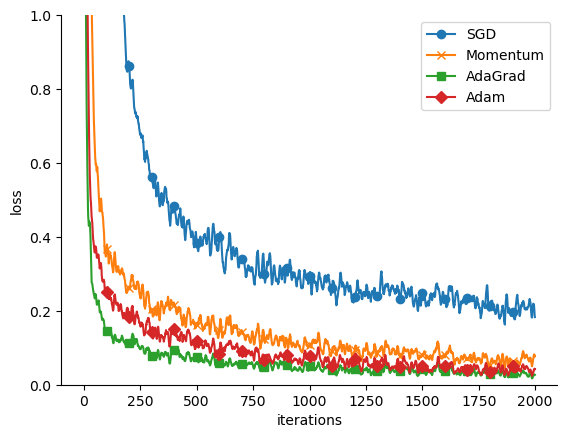

In [6]:
# 3. 그래프 그리기==========
markers = {"SGD": "o", "Momentum": "x", "AdaGrad": "s", "Adam": "D"}
# colors = {"SGD": "k", "Momentum": "r", "AdaGrad": "g", "Adam": "b"} # for custon color
x = np.arange(max_iterations)
for key in optimizers.keys():
    plt.plot(x, smooth_curve(train_loss[key]), marker=markers[key], markevery=100, label=key)
    #plt.plot(x, smooth_curve(train_loss[key]), marker=markers[key], color=colors[key], markevery=100, label=key)
plt.xlabel("iterations")
plt.ylabel("loss")
plt.ylim(0, 1)
plt.legend()
# plt.show()
sns.despine()